<a href="https://colab.research.google.com/github/andreacangiani/NSPDE-ANA2023/blob/main/python/C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

I will assume the knowledge acquired from the 1st semester course by Rozza and Heltai.

Good free book on Scientific Computing with Python:

https://link.springer.com/book/10.1007/978-3-030-50356-7



# Python for Scientific Computing: quick recap

**Why Python?**

    Python is a modern, general-purpose, object-oriented, high-level programming language with huge community of users

* No license costs. Immediately available (no installation required) from cloud computing platforms, eg. Google [Colab](https://colab.research.google.com)
  * You'll need a Google account to access Google colab

* Extensive ecosystem of scientific libraries (modules):
  * [numpy](https://www.numpy.org) - Numerical Python
  * [scipy](https://www.scipy.org) -  Scientific Python
  * [matplotlib](https://www.matplotlib.org) - graphics library
  * [petsc4py](https://gitlab.com/petsc/petsc) & [slepc4py](https://gitlab.com/slepc/slepc) - vast range of sequential or parallel linear or nonlinear solvers, time stepping, optimization, and eigensolvers
  * [FEniCS](https://www.fenicsproject.org/) & [Firedrake](https://www.firedrakeproject.org) - finite element method (FEM) platforms.

You can get this colab notebook by typing the line:

**!git clone https://github.com/andreacangiani/NSPDE-ANA2023.git**

**Modules**

In [ ]:
import math

print(dir(math))

help(math.sin)

x = math.sin(math.pi / 2)

print(x)

del math

In [ ]:
from math import sin, pi

x = sin(pi / 2)

print(x)

**Variables**
Convention: variable names start with a lower-case letter (Class names start with a capital letter).

In [ ]:
x = pi

print(type(x))

x = 1

print(type(x))

**Operators**

* Arithmetic operators: 
    `+`, `-`, `*`, `/`, `//` (integer division), `**` power

* Boolean operators: 
    `and`, `not`, `or`

* Comparison operators: 
    `>`, `<`, `>=` (greater or equal), `<=` (less or equal), `==` equal, `!=` not equal.

In [ ]:
print(2**3)

In [ ]:
my_bool = True and False

my_string = "Can something be true and false at the same time???  "

print(my_string, my_bool)

In [ ]:
3 >= 2

In [ ]:
statement1 = (3 <= 2)
statement2 = (0 == 1)

# Note! Indentation based!
if statement1:
    print("statement1 is True")
elif statement2:
    print("statement2 is True")
else:
    print("statement1 and statement2 are both False")

**Lists**

In [ ]:
my_list = [1, 2, 3, 4, 5, "a"]

print(my_list)

print(type(my_list))

In [ ]:
my_nested_list = [[1, 2], [3, 4, 5]]

print(my_nested_list)

Turning lists into NumPy arrays

In [ ]:
import numpy as np # module for arrays
my_list = [1, 2, 3, 4, 5]
x = np.array(my_list) # turns the list into np array
print(x)
print(type(x))

**"for" and and "while" loops**

In [ ]:
for x in [0, 1, 2, 3]:
    print(x)

print("is identical to")

for x in range(4):
    print(x)

In [ ]:
for x in range(0, -6, -2):
    print(x)

In [ ]:
i = 0
while i < 3:
    print(i)
    i += 1 

print("is identical to")

v = [0, 1, 2, 3]
i = 0
while i<len(v)-1:
  print(v[i])
  i = i + 1

**Functions**

In [ ]:
def mult(f1,f2):
  # returns product of arguments
  return f1*f2

print(mult(2,3))

In [ ]:
def mult_and_sum (f1,f2):
  # returns product of arguments
  return f1 * f2, f1 + f2

m, s = mult_and_sum(2,3)
print(m, s)

In [ ]:
def powers (x,p=2):
  # returns given power
  # default is p=2
  return x**p

print(powers(2))  
print(powers(2,3))  

Function implementing:
$$
f(x)=
\left\{
\begin{array}{l}
0,\quad x<0\\
x,\quad 0\le x<1\\
2-x,\quad 1\le x<2\\
0,\quad x\ge 2
\end{array}
\right.
$$

In [ ]:
def f(x):
  if x < 0: 
    return 0 
  elif 0 <= x < 1: 
    return x
  elif 1 <= x < 2: 
    return 2 - x 
  elif x >= 2: 
    return 0

In [ ]:
f(3)

Lambda functions are one-line functions:

In [ ]:
f = lambda x, y: x**2 - 1 +y

f(1,1)

# Divided Difference formulas

Implement basic divided difference formulas:

$\delta_{h,+} f (x)= \frac{f(x+h)-f(x)}{h}  \quad$    (FD)

$\delta_{h,-} f (x)= \frac{f(x)-f(x-h)}{h}  \quad$    (BD)

$\delta_{h} f (x)= \frac{f(x+h/2)-f(x-h/2)}{h}  \quad$    (CD)

In [ ]:
import matplotlib
#pylap inline 
import sympy as sym

In [ ]:
def forw_diff(x,h,f):
  return (f(x+h)-f(x))/h

In [ ]:
t = sym.var('t')
my_f = 0.5 * t**2
fsym =sym.lambdify(t, my_f)

In [ ]:
h=.2
x=0.5
print(forw_diff(x,h,fsym))

Let us now fix a grid and compute the FD in matrix form

In [ ]:
a = 0
b = 1
N = 5
h = (b-a)/N
x = np.linspace(0,1,N+1)
print(x)

In [ ]:
FD = np.zeros((N+1,N+1))

for i in range(N):
  FD[i,i] = -1
  FD[i, i+1] = 1

FD = FD/h

In [ ]:
v = fsym(x)

v_x = FD.dot(v)[0:N]

print(v_x)

In [ ]:
def F_D(a,b,N):

  h = (b-a)/N

  FD = np.zeros((N+1,N+1))
  for i in range(N):
    FD[i,i] = -1
    FD[i, i+1] = 1

  return FD/h

In [ ]:
FD = F_D(a,b,N)

v_x = FD.dot(v)[0:N]

print(v_x)

Let's check convergence!

In [ ]:
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_x = sym.lambdify(t, my_f.diff(t,1))

no_expe = 8
error = np.zeros(no_expe)
NN = np.zeros(no_expe)

for i in range(no_expe):
  N = 2**(i+1)
  NN[i] = N

  x = np.linspace(0,1,N+1)
  FD = F_D(a,b,N)
  u_x = FD.dot(fsym(x))[1:N]
  error[i] = max(abs(u_x-fsym_x(x)[1:N]))



In [ ]:
print(error)

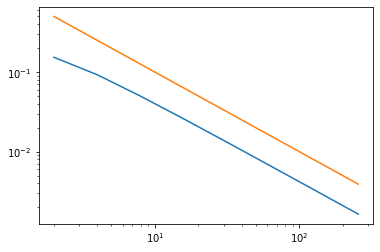

In [ ]:
import matplotlib

matplotlib.pyplot.loglog(NN,error)

matplotlib.pyplot.loglog(NN,NN**(-1))